In [1]:
from skrub import (
    GapEncoder,
    TableReport,
    TextEncoder,
    TableVectorizer,
)
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import make_pipeline
import pandas as pd
from utils import plot_gap_feature_importance

In [2]:
highlights_sample_01 = pd.read_csv("../data/highlights_sample_01.csv")

## Gap Encoder

In [46]:
gap = GapEncoder(n_components=30, ngram_range=(2, 5))

highlight_body_list = highlights_sample_01["body"]
highlight_primary_theme_list = highlights_sample_01["theme_name"]
highlight_id_list = highlights_sample_01["highlight_id"]

x_transformed = gap.fit_transform(highlight_body_list)

In [27]:
TableReport(x_transformed)

Processing column  31 / 31


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [28]:
x_transformed[5:10]

,"body: mediterranean, fischereihafen, restaurants","body: massager, massage, massages","body: refreshing, outdoor, outdoors","body: helpfulness, helpful, excellent","body: advertised, photographs, provided","body: mentioned, several, minutes","body: travelers, travel, choice","body: individuals, insecurity, suspicious","body: children, relaxing, childcare","body: transportation, seamlessly, transport",...,"body: complimentary, toiletries, hairdryer","body: atmosphere, relaxation, perfect","body: convenient, offering, offerings","body: unavailable, available, yourself","body: criticized, quality, breakfast","body: japanese, delicious, yukata","body: comfortable, comfortably, appreciate","body: malfunctioning, conditioning, functioning","body: soundproofing, activity, insulation",body
5,0.787033,0.146224,10.374237,0.108377,0.511851,1.001276,0.095792,0.538047,0.088320,0.089438,...,0.188771,0.123637,0.147760,0.099763,0.183747,0.193890,0.152741,0.232861,3.118751,location
6,0.081264,0.077338,0.083291,0.074876,0.075550,0.094621,0.249389,0.076273,0.130050,31.364494,...,0.069680,0.230282,0.099835,0.074740,0.088446,0.127234,0.113506,0.276842,0.077403,miscellaneous
7,54.596472,0.284685,6.579758,5.507445,0.084221,0.099614,1.422912,0.172715,0.097614,0.107269,...,0.385040,0.095628,30.579531,10.004266,2.337266,44.374460,0.170572,0.095731,0.099275,dining_and_cuisine
8,0.169629,0.214021,0.101961,191.930563,0.125587,0.163858,0.172280,0.506850,0.113989,0.257474,...,0.132071,0.489341,0.074992,0.431699,7.999046,0.135431,0.098246,0.084884,0.134186,experience
9,0.133257,0.244055,0.176160,33.654182,0.104537,0.122761,15.260366,0.077312,1.600243,0.414287,...,1.050417,58.646193,0.192700,0.761204,0.099218,6.314262,40.184776,0.109181,0.126063,experience


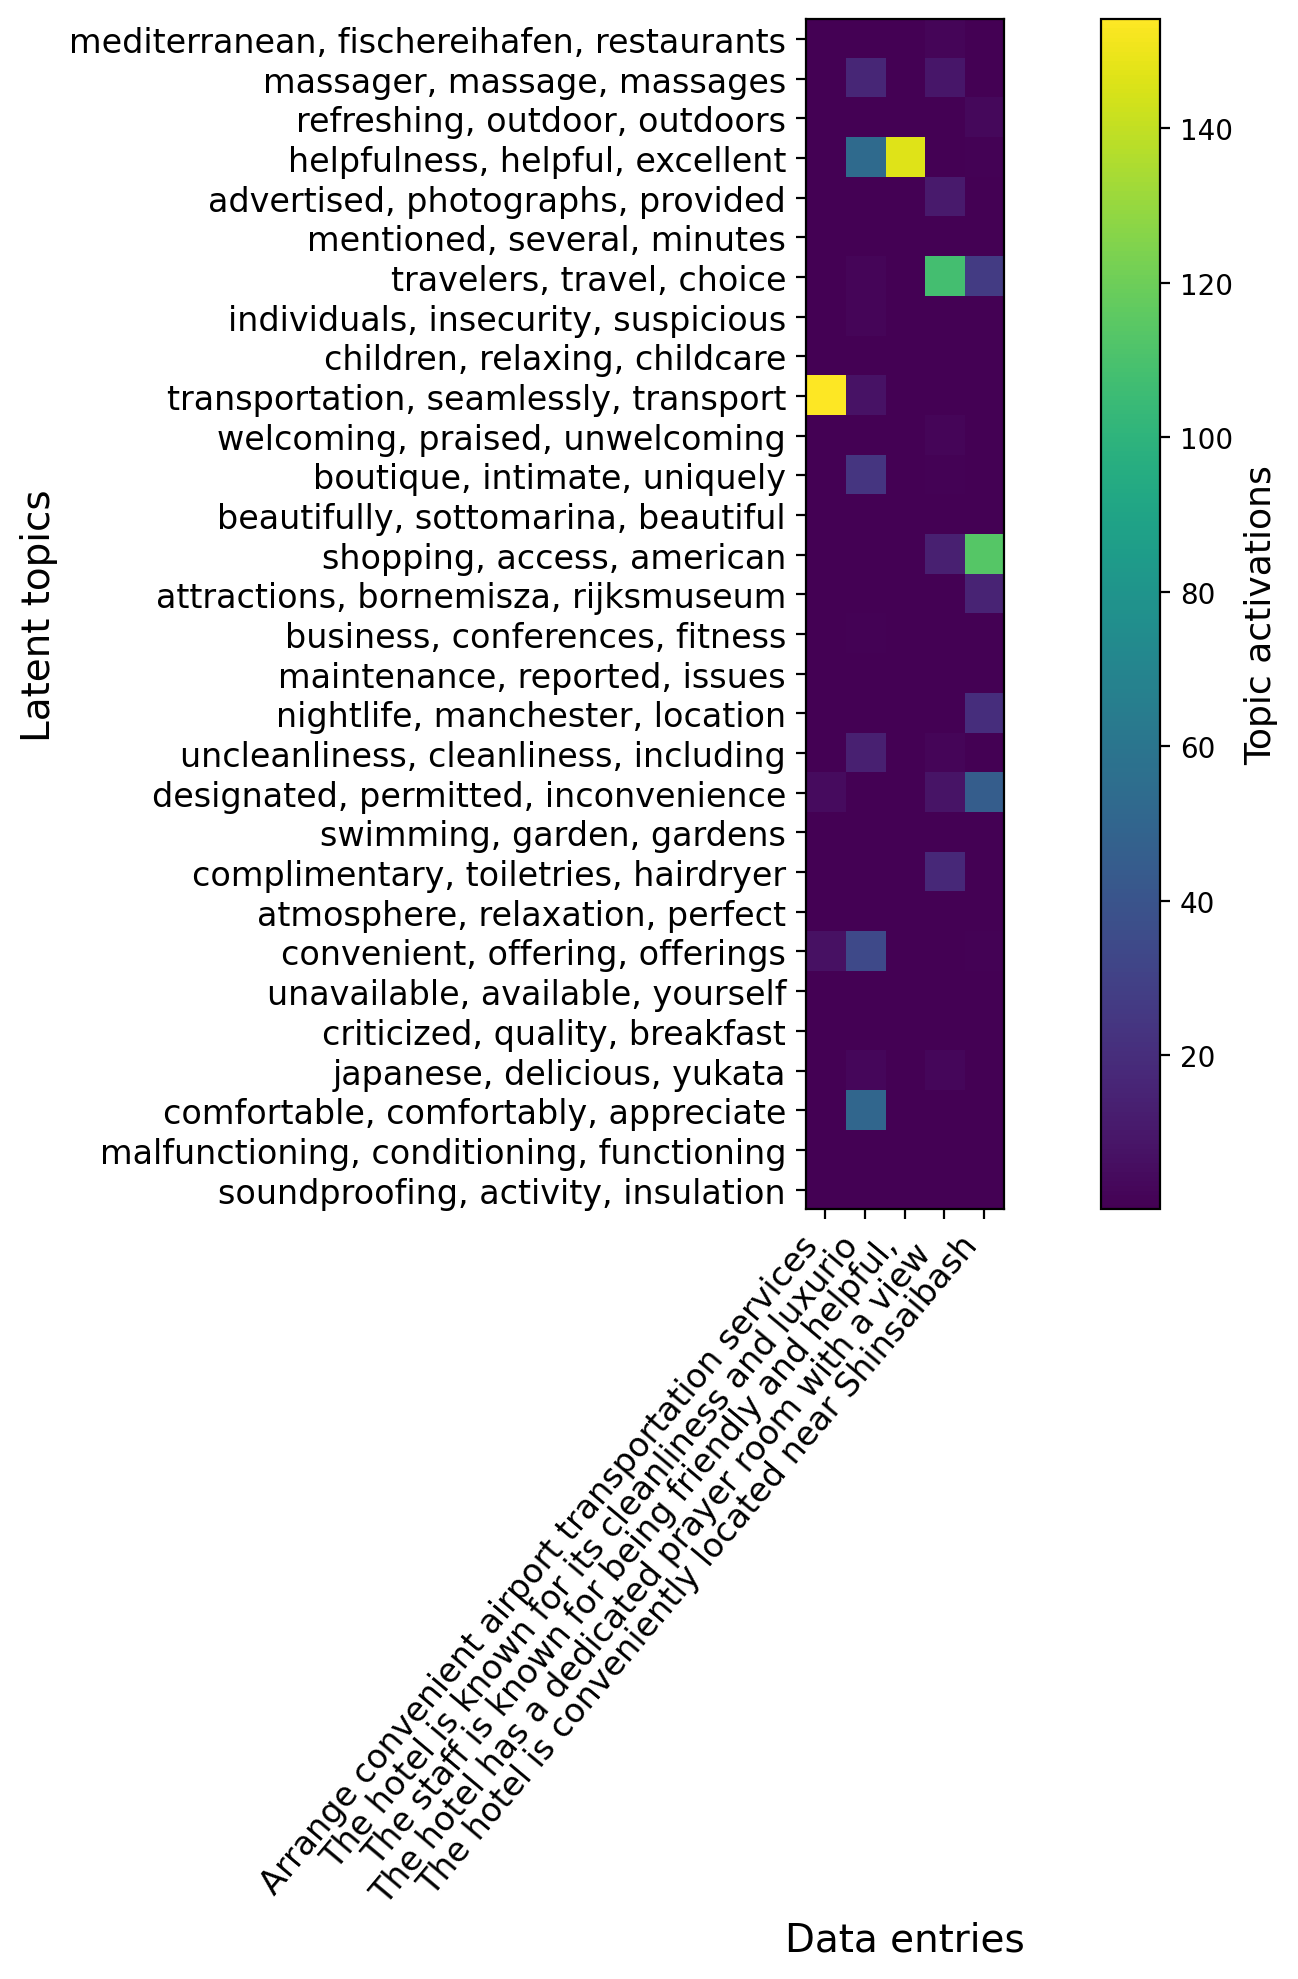

In [44]:
x_transformed["body"] = highlight_body_list

# y = x_transformed.drop(columns=["primary_theme"])
input_sample = x_transformed[0:5]
input_sample_labels = input_sample["body"].str[:50]
# .values + "..."
# input_sample_labels = highlight_primary_theme_list[0:20]
plot_gap_feature_importance(
    input_sample, item_labels=input_sample_labels, prefix="body"
)

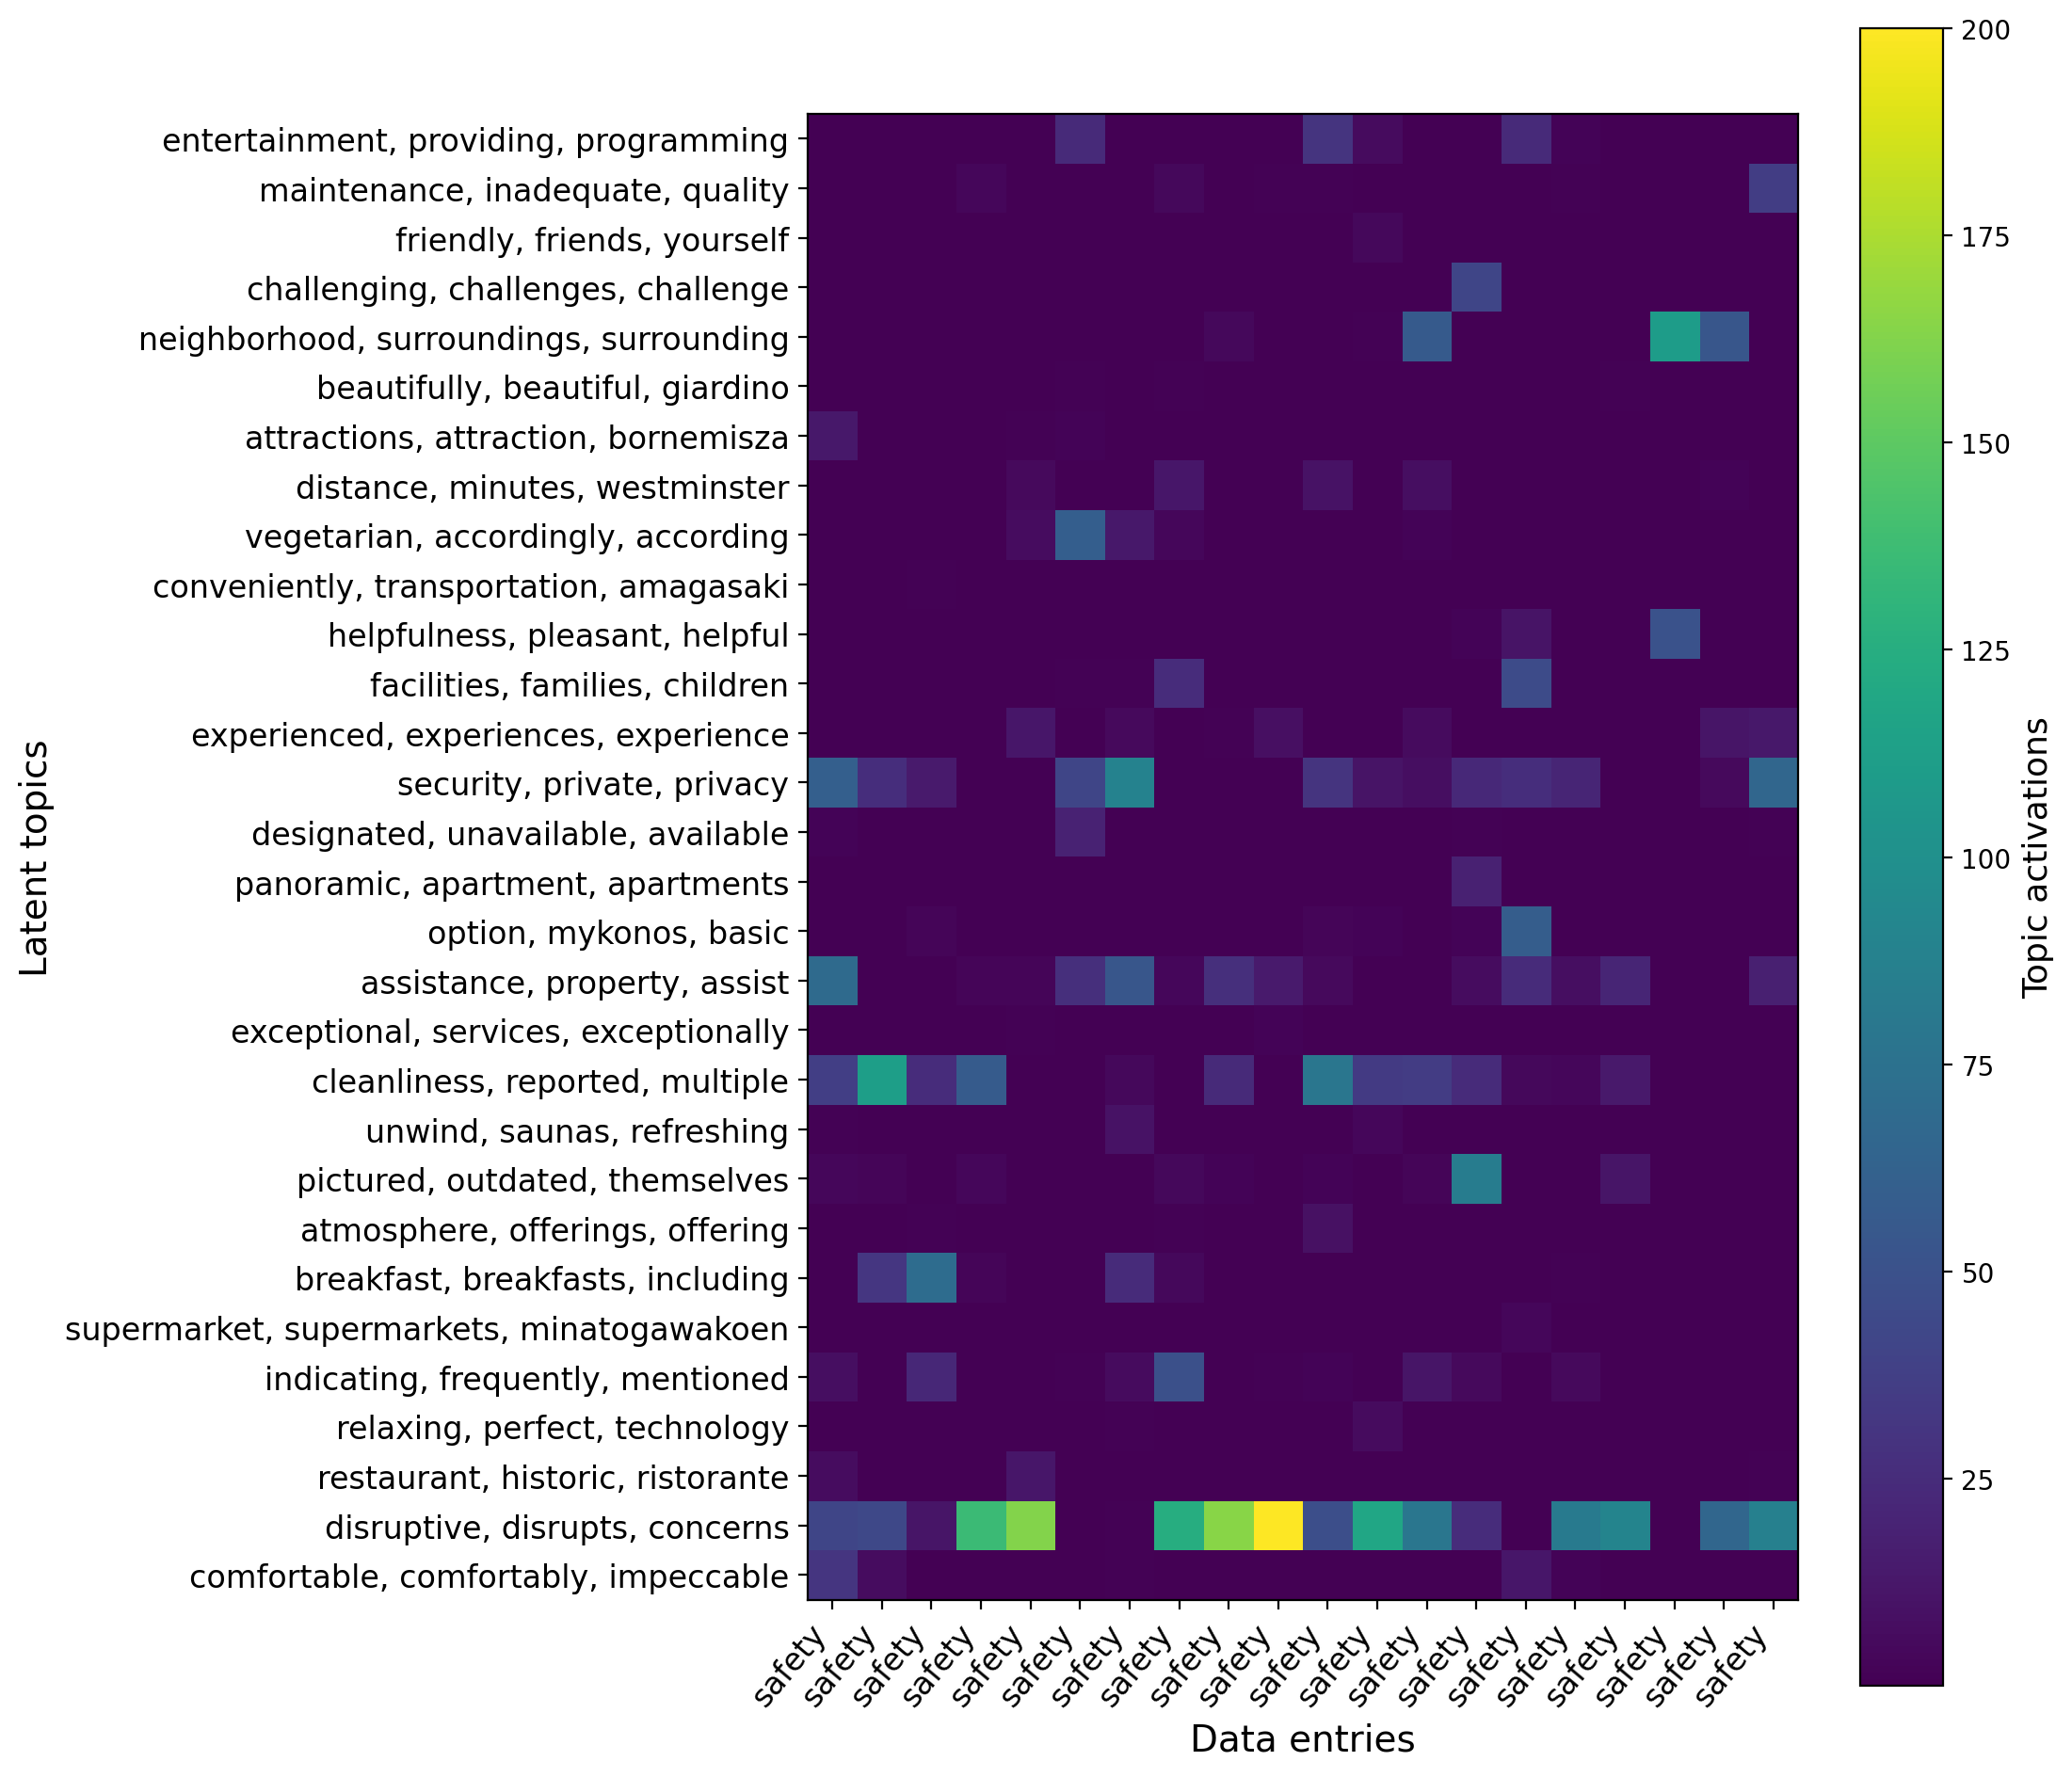

In [ ]:
sample_range_min = 0
sample_range_max = 5

x_transformed["body"] = highlight_primary_theme_list

filter_group = x_transformed["body"] == "safety"

x_transformed_subset = x_transformed[filter_group]

input_sample = x_transformed_subset[sample_range_min:sample_range_max]
input_sample_labels = input_sample["body"]
# .values + "..."
# input_sample_labels = highlight_primary_theme_list[0:20]
plot_gap_feature_importance(
    input_sample, item_labels=input_sample_labels, prefix="body"
)

In [ ]:
# highlight_body_list[filter_group][0:20]
sample_data = highlights_sample_01[["highlight_id", "body", "sentiment"]][filter_group][
    sample_range_min:sample_range_max
]
TableReport(sample_data)

Processing column   3 / 3


<TableReport: use .open() to display>

## Text Encoder

In [ ]:
text_encoder = TextEncoder(
    "sentence-transformers/paraphrase-albert-small-v2",
    device="cpu",
)

text_encoder_pipe = make_pipeline(
    TableVectorizer(high_cardinality=text_encoder),
    HistGradientBoostingClassifier(),
)

In [ ]:
x_transformed_text = text_encoder.fit_transform(highlight_body_list)

In [ ]:
x_transformed_text

In [ ]:
# text_encoder_results = cross_validate(text_encoder_pipe, X, y, scoring="roc_auc")
# results.append(("TextEncoder", text_encoder_results))